## Lecture

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

e:\conda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


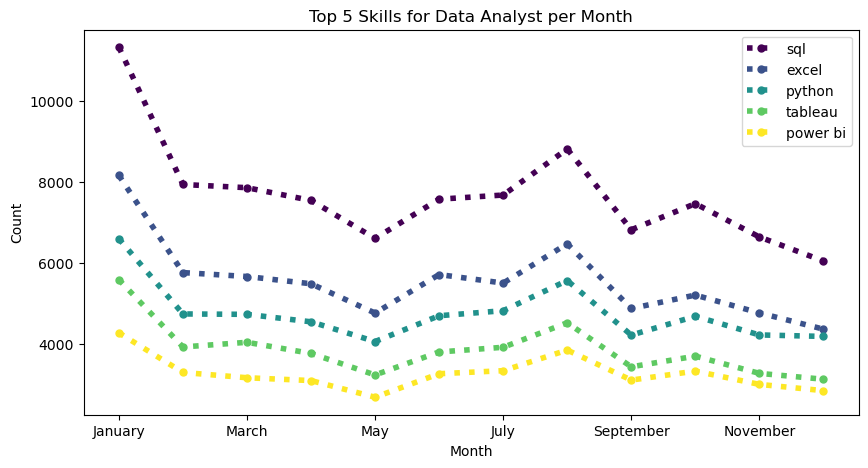

In [6]:
df_da = df[df['job_title_short']=='Data Analyst'].copy()
df_da['job_posted_month_no'] = df['job_posted_date'].dt.month
df_da_exploded = df_da.explode('job_skills')
df_da_pivot = df_da_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size')
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop(['Total'])
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda month: pd.to_datetime(month, format='%m').strftime('%B'))
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_no')
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: '-' line, '--' dashline, ':' dot, '-.'dashline + dot
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
    )
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Top 5 Skills for Data Analyst per Month')
plt.legend()
plt.show()

In [7]:
df_exploded = df_da.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(skill_count)


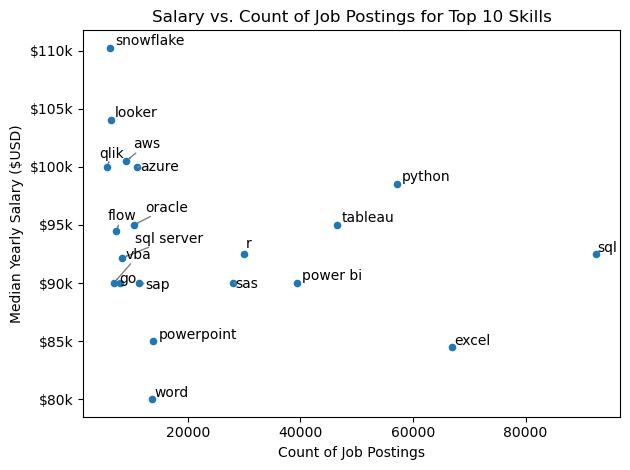

In [21]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle="->",color='gray',lw=1))
ax=plt.gca() #fig, ax = plt.subplots() is an alternative to this code
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

## Homework

   job_posted_month  count
0           2023-01   1295
1           2023-02    843
2           2023-03    883
3           2023-04   1051
4           2023-05    480
5           2023-06    714
6           2023-07   1059
7           2023-08   1378
8           2023-09   1022
9           2023-10   1186
10          2023-11   1268
11          2023-12   1152


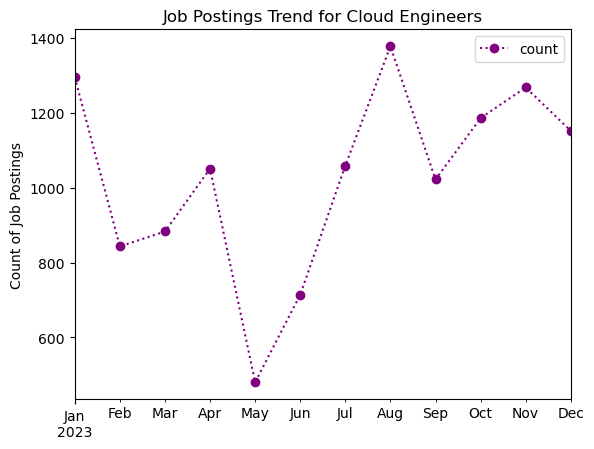

In [31]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
df_plot = df_ce.groupby('job_posted_month').size().reset_index(name='count')
print(df_plot)
df_plot.plot(
    kind='line',
    x='job_posted_month', y='count',
    linestyle=':',
    color='purple',
    marker="o"
    )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

In [32]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


Text(0.5, 1.0, 'Top 5 Companies hiring Senior Data Analysts by Number of Postings')

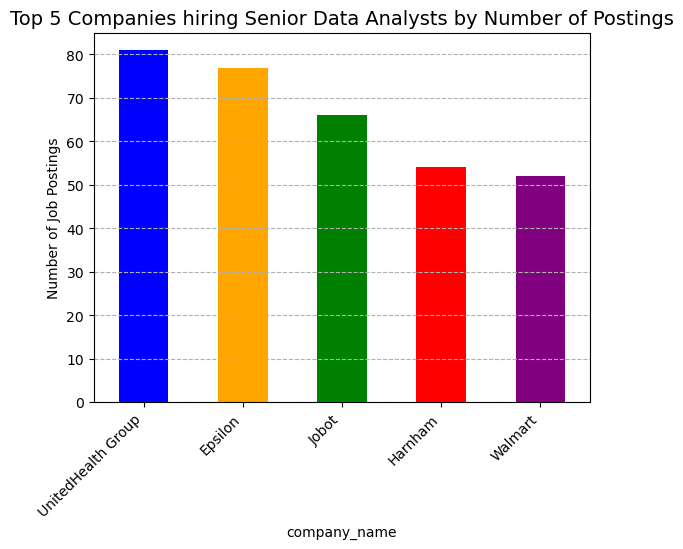

In [54]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
SDA_df = df[df['job_title']=='Senior Data Analyst']
top5_companies = SDA_df['company_name'].value_counts().sort_values(ascending=False).head()
top5_companies.plot(
    kind='bar',
    color=colors
    )
plt.xticks(rotation=45, ha='right' )
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings',fontsize=14)